##**athletes data**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install datetime
from datetime import datetime

In [ ]:
#Load data
data = pd.read_csv("/content/athletes.csv")

Explore Data

In [ ]:
#Check head
data.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [ ]:
#Check shape
data.shape

(11656, 14)

In [ ]:
#Check data types of each column
data.dtypes

name                 object
short_name           object
gender               object
birth_date           object
birth_place          object
birth_country        object
country              object
country_code         object
discipline           object
discipline_code      object
residence_place      object
residence_country    object
height_m/ft          object
url                  object
dtype: object

In [ ]:
#Check for null values
data.isnull().sum()

name                    0
short_name              0
gender                159
birth_date            159
birth_place          4048
birth_country        3336
country                 0
country_code            0
discipline            159
discipline_code         0
residence_place      4407
residence_country    5111
height_m/ft          7001
url                     0
dtype: int64

In [ ]:
#Check for total number of unique values in each column
data.nunique()

name                 11629
short_name           11186
gender                   2
birth_date            5685
birth_place           3684
birth_country          199
country                206
country_code           206
discipline              46
discipline_code         46
residence_place       2404
residence_country      161
height_m/ft             78
url                  11656
dtype: int64

Data Cleaning/ Manipulation

In [ ]:
#Drop columns with large number of missing values
data = data.drop(columns = ["short_name", "birth_place", "birth_country", "residence_place", "residence_country", "height_m/ft"])

In [ ]:
#Dropping rows with missing values
data = data.dropna()

In [ ]:
#Re-check missing values for confirmation
data.isnull().sum()

name               0
gender             0
birth_date         0
country            0
country_code       0
discipline         0
discipline_code    0
url                0
dtype: int64

In [ ]:
#Re-check shape
data.shape

(11497, 8)

In [ ]:
#Descriptive Statistics of the data
data.describe()

,name,gender,birth_date,country,country_code,discipline,discipline_code,url
count,11497,11497,11497,11497,11497,11497,11497,11497
unique,11470,2,5685,206,206,46,46,11497
top,PEREZ Paola,Male,1997-01-01,United States of America,USA,Athletics,ATH,../../../en/results/cycling-road/athlete-profi...
freq,2,6002,10,628,628,2033,2033,1


In [ ]:
#Creating "Age" column from the "birth_date" column using the datetime function
data["birth_date"] = pd.to_datetime(data["birth_date"]) #Convert column to datetime
current_date = datetime.now() #Extracting current date

data["Age"] = (current_date - data["birth_date"]).dt.days / 365 #Creating new column
data["Age"] = data["Age"].astype(int) #Coverting to int type
data["Age"] #Printing the column

0        29
1        31
2        29
3        28
4        35
         ..
11651    37
11652    25
11653    28
11654    27
11655    26
Name: Age, Length: 11497, dtype: int64

In [ ]:
#Drop column "birth_date" since it is no longer needed
data = data.drop(columns = "birth_date")

<Axes: >

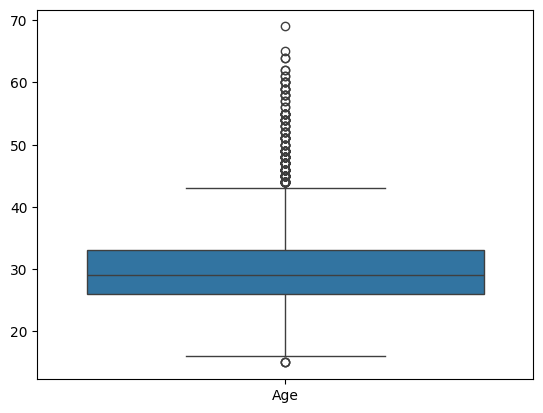

In [ ]:
#Boxplot to check for outliers
sns.boxplot(data)

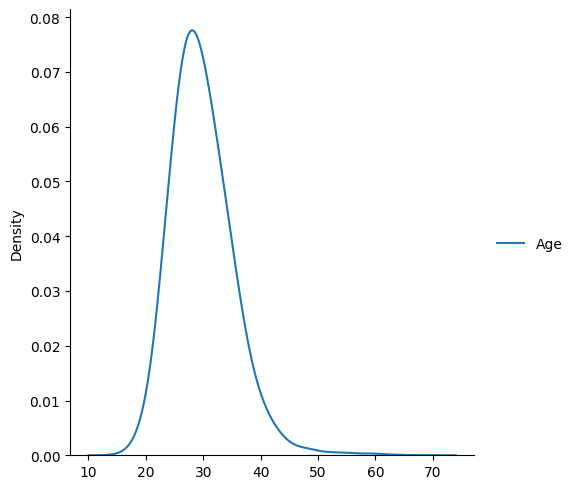

In [ ]:
#Displot to check distributuion of data
sns.displot(data, kind = "kde", bw_adjust = 2)

In [ ]:
#Check maximum age
data["Age"].max()

69

In [ ]:
#Find Outliers using IQR Method
#percentile25 = data['Age'].quantile(0.25)
#percentile75 = data['Age'].quantile(0.75)
#iqr = percentile75 - percentile25
#upper_limit = percentile75 + 1.5 * iqr
#lower_limit = percentile25 - 1.5 * iqr
#data[data['Age'] > upper_limit]
#data[data['Age'] < lower_limit]

In [ ]:
#Capping outliers using IQR method
#data["Age"] = np.where(
#    data['Age'] > upper_limit, upper_limit,
#     np.where(
#         data["Age"] < lower_limit, lower_limit,
#         data["Age"]
#     )
#)
#data.head()

In [ ]:
#Check boxplot again
#sns.boxplot(data)

In [ ]:
#Check distribution again
#sns.displot(data, kind = "kde", bw_adjust = 2)

In [ ]:
# Get list of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['name', 'gender', 'country', 'country_code', 'discipline',
       'discipline_code', 'url'],
      dtype='object')

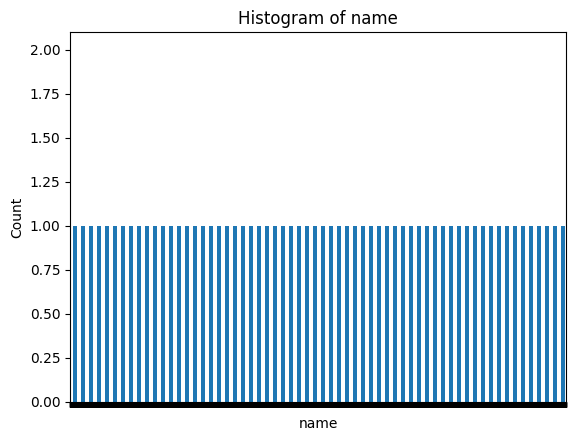

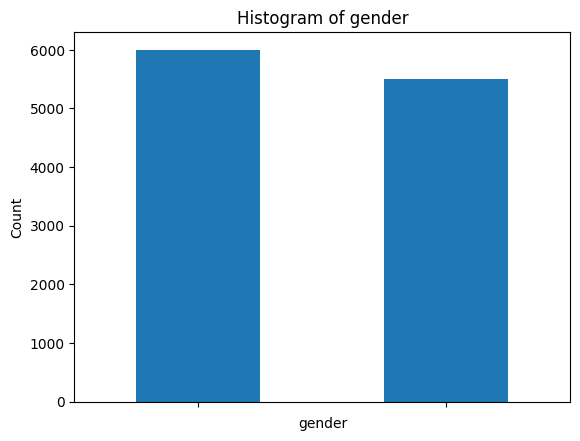

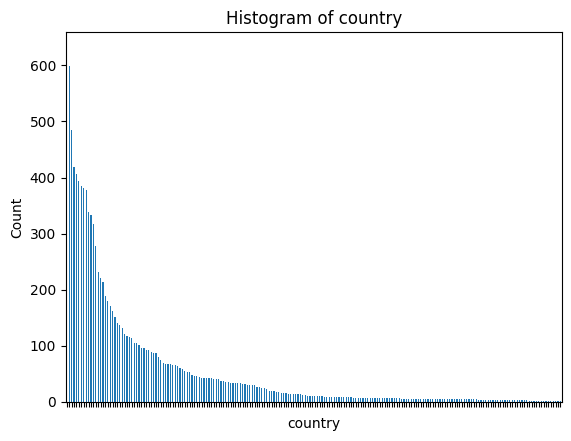

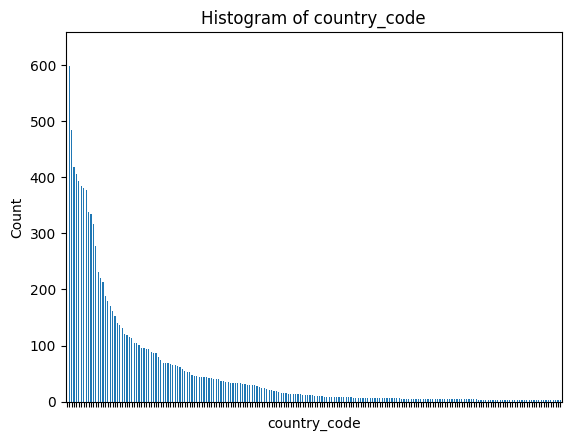

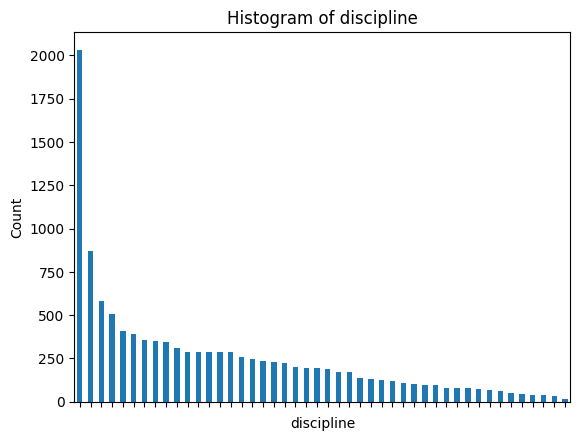

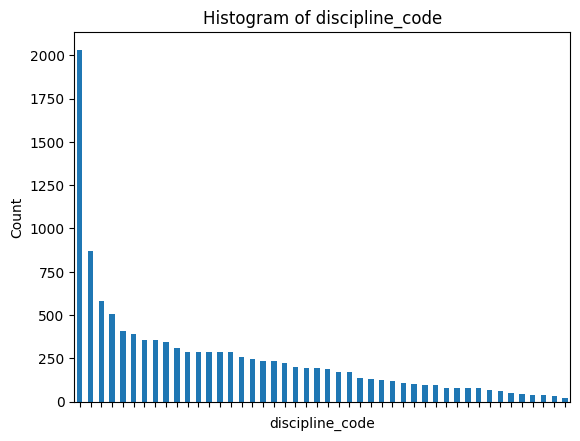

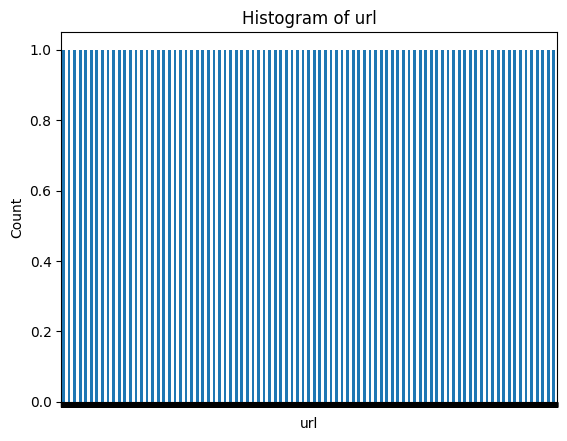

In [ ]:
# Plot histogram for each categorical column
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.gca().set_xticklabels([]) #Removing/Hiding xlabels
    plt.show()

In [ ]:
data.head()

,name,gender,country,country_code,discipline,discipline_code,url,Age
0,AALERUD Katrine,Female,Norway,NOR,Cycling Road,CRD,../../../en/results/cycling-road/athlete-profi...,29
1,ABAD Nestor,Male,Spain,ESP,Artistic Gymnastics,GAR,../../../en/results/artistic-gymnastics/athlet...,31
2,ABAGNALE Giovanni,Male,Italy,ITA,Rowing,ROW,../../../en/results/rowing/athlete-profile-n13...,29
3,ABALDE Alberto,Male,Spain,ESP,Basketball,BKB,../../../en/results/basketball/athlete-profile...,28
4,ABALDE Tamara,Female,Spain,ESP,Basketball,BKB,../../../en/results/basketball/athlete-profile...,35


In [ ]:
data.to_csv("athletes_cleaned.csv")

##**coaches data**

In [ ]:
#Loading the data
data = data = pd.read_csv("/content/coaches.csv")

Exploring data

In [ ]:
#Check head
data.head()

,name,short_name,gender,birth_date,country_code,discipline,function,event,url
0,ABDELMAGID Wael,ABDELMAGID W,Male,1982-08-02,EGY,Football,Head Coach,NaN,../../../en/results/football/athlete-profile-n...
1,ABE Junya,ABE J,Male,1990-07-25,JPN,Volleyball,Head Coach,NaN,../../../en/results/volleyball/athlete-profile...
2,ABE Katsuhiko,ABE K,Male,1979-09-23,JPN,Basketball,Coach,NaN,../../../en/results/basketball/athlete-profile...
3,ADAMA Cherif,ADAMA C,Male,1962-05-06,CIV,Football,Head Coach,NaN,../../../en/results/football/athlete-profile-n...
4,AGEBA Yuya,AGEBA Y,Male,1983-09-30,JPN,Volleyball,Head Coach,NaN,../../../en/results/volleyball/athlete-profile...


In [ ]:
#Check shape
data.shape

(407, 9)

In [ ]:
#Check data types
data.dtypes

name            object
short_name      object
gender          object
birth_date      object
country_code    object
discipline      object
function        object
event           object
url             object
dtype: object

In [ ]:
#Check null values
data.isnull().sum()

name              0
short_name        0
gender            0
birth_date        0
country_code      0
discipline        0
function          0
event           126
url               0
dtype: int64

In [ ]:
#Check total number of unique values in each column
data.nunique()

name            392
short_name      392
gender            2
birth_date      386
country_code     59
discipline        9
function          2
event             6
url             393
dtype: int64

In [ ]:
#Check unique values and their count in column "event"
data["event"].value_counts()

event
Men         94
Women       88
Duet        31
Baseball    29
Softball    21
Team        18
Name: count, dtype: int64

In [ ]:
#Check unique values and their count in column "function"
data["function"].value_counts()

function
Coach         227
Head Coach    180
Name: count, dtype: int64

In [ ]:
#Check unique values and their count in column "discipline"
data["discipline"].value_counts()

discipline
Basketball           74
Football             59
Artistic Swimming    58
Baseball/Softball    51
Hockey               45
Volleyball           44
Handball             29
Rugby Sevens         25
Water Polo           22
Name: count, dtype: int64

In [ ]:
#Drop columns not needed
data = data.drop(columns = ["event", "short_name"])

In [ ]:
#Re-check head of data
data.head()

,name,gender,birth_date,country_code,discipline,function,url
0,ABDELMAGID Wael,Male,1982-08-02,EGY,Football,Head Coach,../../../en/results/football/athlete-profile-n...
1,ABE Junya,Male,1990-07-25,JPN,Volleyball,Head Coach,../../../en/results/volleyball/athlete-profile...
2,ABE Katsuhiko,Male,1979-09-23,JPN,Basketball,Coach,../../../en/results/basketball/athlete-profile...
3,ADAMA Cherif,Male,1962-05-06,CIV,Football,Head Coach,../../../en/results/football/athlete-profile-n...
4,AGEBA Yuya,Male,1983-09-30,JPN,Volleyball,Head Coach,../../../en/results/volleyball/athlete-profile...


In [ ]:
#Re-check sum of missing values
data.isnull().sum()

name            0
gender          0
birth_date      0
country_code    0
discipline      0
function        0
url             0
dtype: int64

In [ ]:
#Descriptive Statistics
data.describe()

,name,gender,birth_date,country_code,discipline,function,url
count,407,407,407,407,407,407,407
unique,392,2,386,59,9,2,393
top,HAMMETT Bianca,Male,1969-12-19,JPN,Basketball,Coach,../../../en/results/artistic-swimming/athlete-...
freq,2,312,3,42,74,227,2


In [ ]:
#Calculate Age of Coaches using their birth date
#Create new column "Age"
data["birth_date"] = pd.to_datetime(data["birth_date"]) #Convert column to datetime
current_date = datetime.now()
data["Age"] = (current_date - data["birth_date"]).dt.days / 365
data["Age"] = data["Age"].astype(int)
data["Age"]

0      41
1      33
2      44
3      62
4      40
       ..
402    39
403    42
404    43
405    60
406    35
Name: Age, Length: 407, dtype: int64

In [ ]:
#Drop column "birth_date"
data = data.drop(columns = "birth_date")

<Axes: >

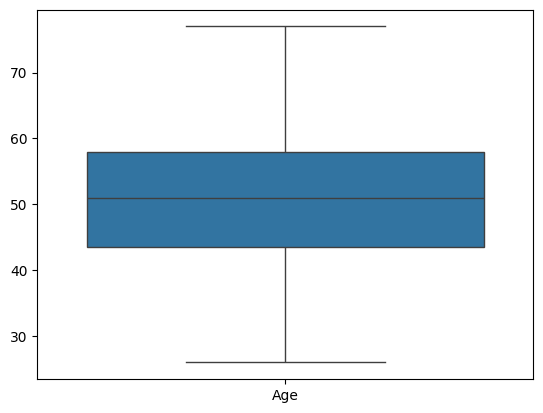

In [ ]:
#Boxplot to check for outliers
sns.boxplot(data)

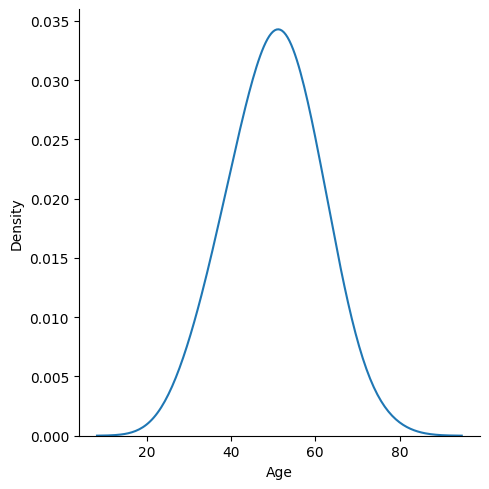

In [ ]:
#Check distribution
sns.displot(data, x = "Age", kind = "kde", bw_adjust = 2)

In [ ]:
# Get list of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['name', 'gender', 'country_code', 'discipline', 'function', 'url'], dtype='object')

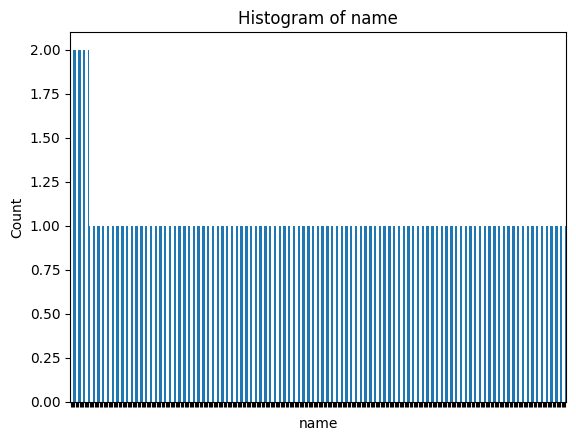

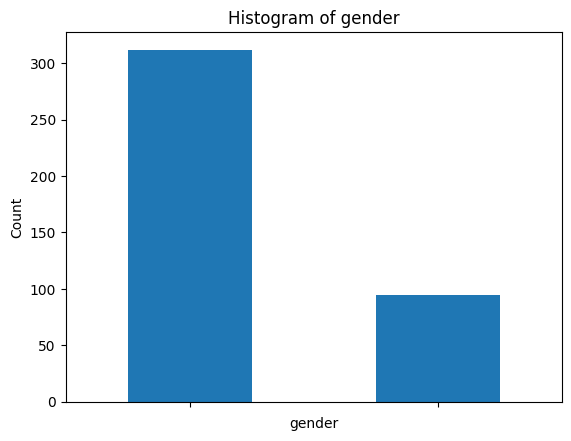

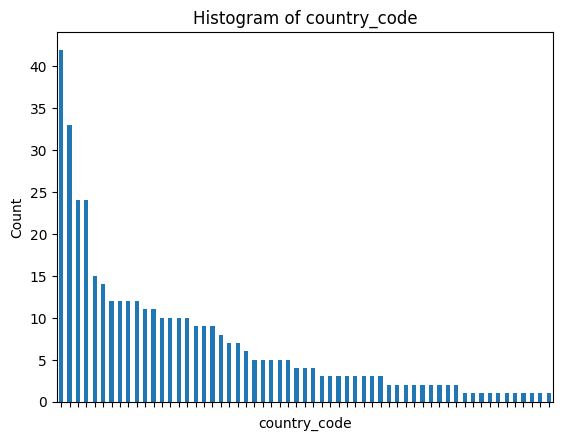

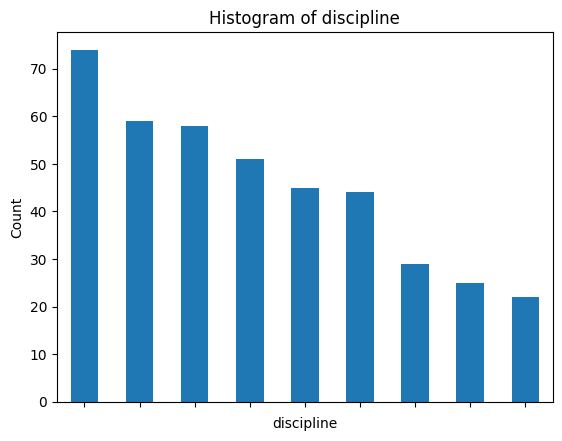

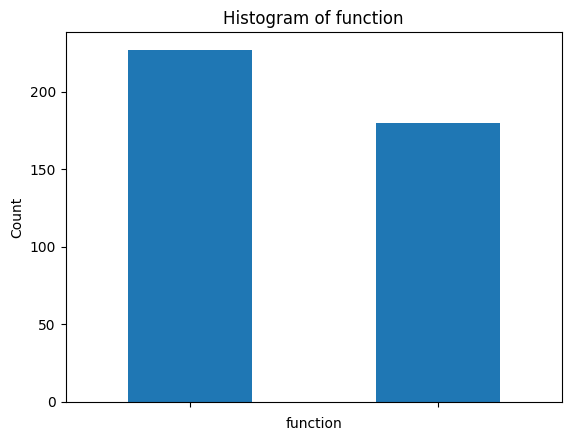

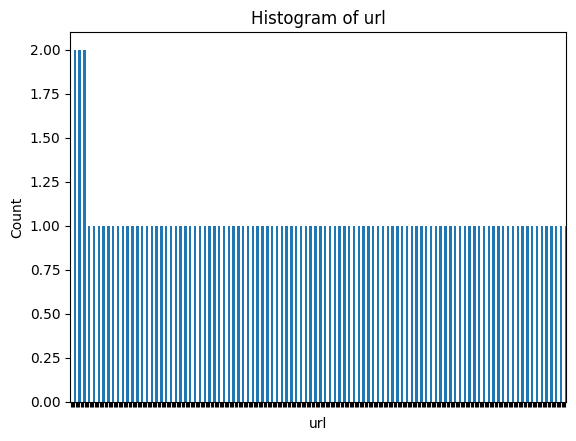

In [ ]:
# Plot histogram for each categorical column
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.gca().set_xticklabels([])
    plt.show()

In [ ]:
#Store cleaned data as csv file
data.to_csv("coaches_cleaned.csv")

##**medals data**

In [ ]:
#Load data
data = data = pd.read_csv("/content/medals.csv")

In [ ]:
#Check head
data.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [ ]:
#Check shape
data.shape

(2401, 12)

In [ ]:
#Check data types
data.dtypes

medal_type            object
medal_code             int64
medal_date            object
athlete_short_name    object
athlete_name          object
athlete_sex           object
athlete_link          object
country_code          object
discipline_code       object
event                 object
country               object
discipline            object
dtype: object

In [ ]:
#Check for sum of null values
data.isnull().sum()

medal_type            0
medal_code            0
medal_date            0
athlete_short_name    0
athlete_name          0
athlete_sex           0
athlete_link          0
country_code          0
discipline_code       0
event                 0
country               0
discipline            0
dtype: int64

In [ ]:
#Check total number of unique values in each column
data.nunique()

medal_type               3
medal_code               3
medal_date              16
athlete_short_name    2134
athlete_name          2174
athlete_sex              4
athlete_link          2176
country_code            93
discipline_code         46
event                  298
country                 93
discipline              46
dtype: int64

In [ ]:
#Drop unnecessary column
data = data.drop(columns = ["athlete_short_name"])

In [ ]:
#Descriptive Statistics
data.describe()

,medal_code
count,2401.000000
mean,2.028738
std,0.823867
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


<Axes: >

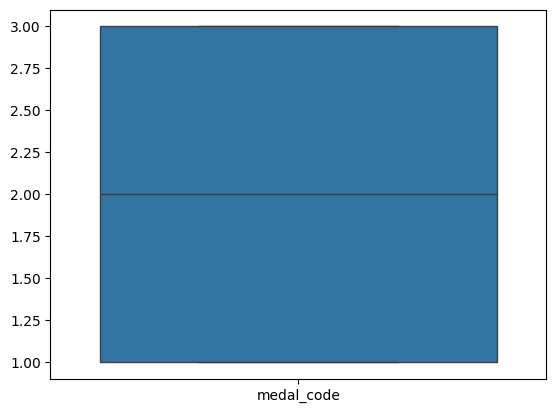

In [ ]:
#Boxplot to check for outliers
sns.boxplot(data)

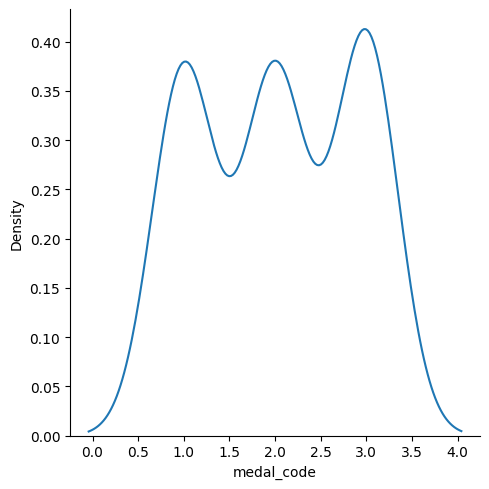

In [ ]:
#Displot to check distribution
sns.displot(data, x = "medal_code", kind = "kde", bw_adjust = 2)

In [ ]:
# Get list of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['medal_type', 'medal_date', 'athlete_name', 'athlete_sex',
       'athlete_link', 'country_code', 'discipline_code', 'event', 'country',
       'discipline'],
      dtype='object')

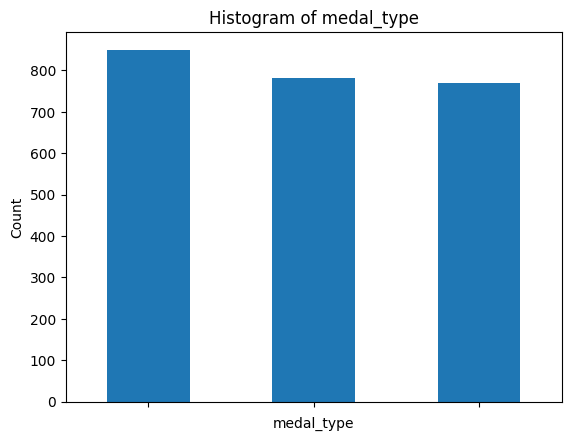

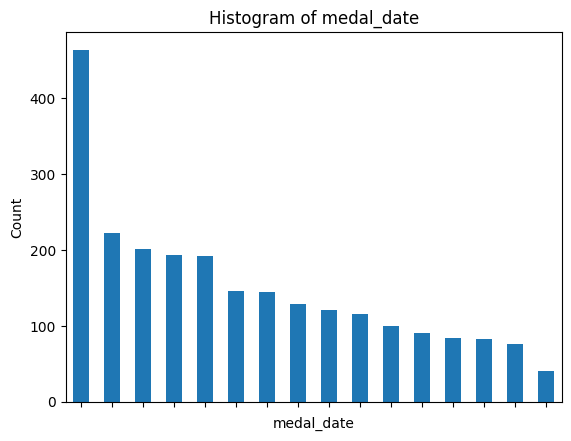

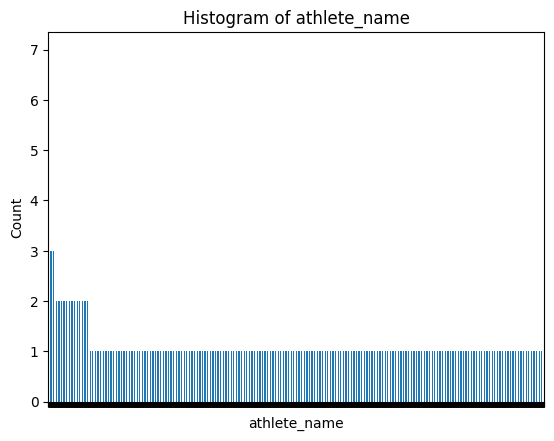

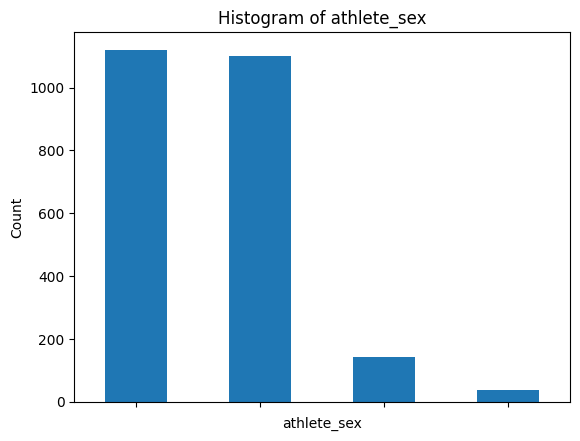

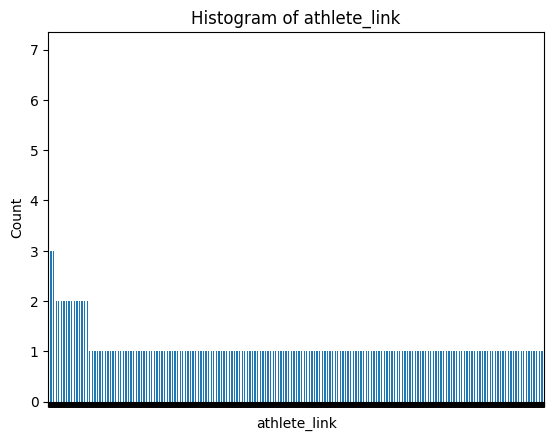

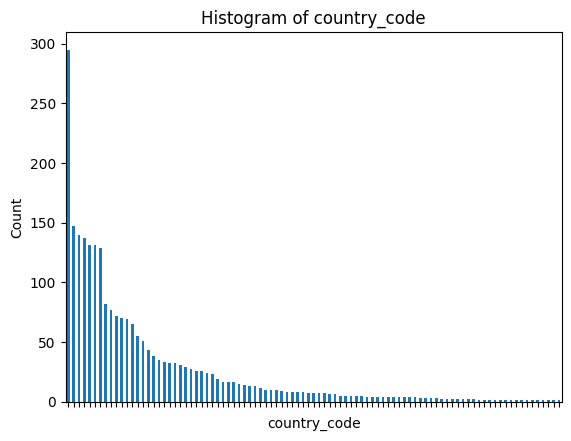

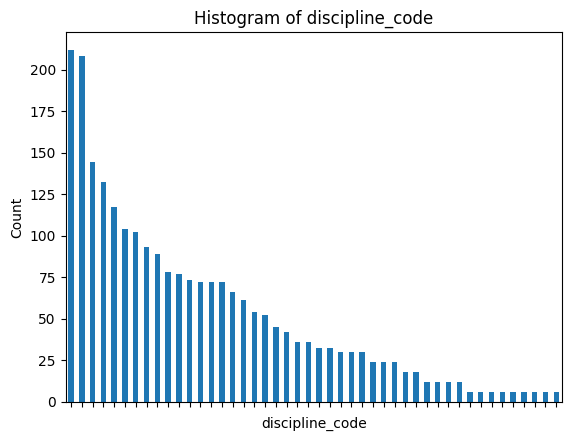

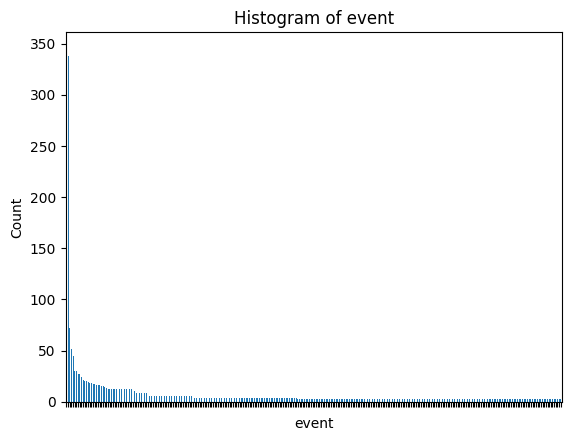

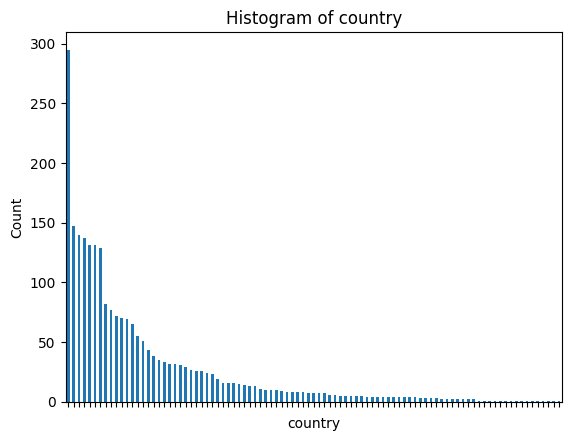

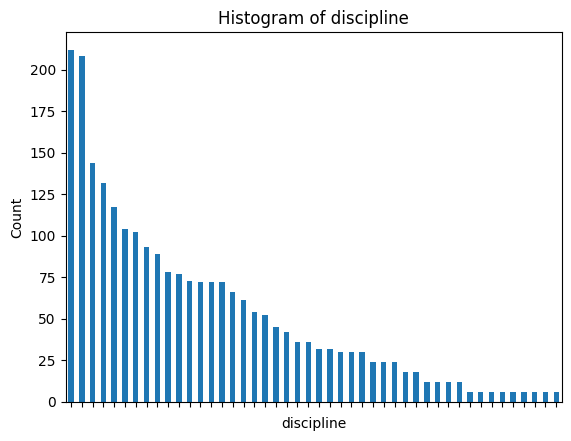

In [ ]:
# Plot histogram for each categorical column
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.gca().set_xticklabels([])
    plt.show()

In [ ]:
#Re-check head of data
data.head()

,medal_type,medal_code,medal_date,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [ ]:
#Convert dataframe to to csv
data.to_csv("medals_cleaned.csv")

##**medals_total dataset**

In [ ]:
#Load data
data = pd.read_csv("/content/medals_total.csv")

In [ ]:
data.head()

,Rank,Country Code,Gold Medal,Silver Medal,Bronze Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
2,3,JPN,27,14,17,58,Japan
3,4,GBR,22,21,22,65,Great Britain
4,5,ROC,20,28,23,71,ROC


In [ ]:
data.shape

(93, 7)

In [ ]:
data.dtypes

Rank             int64
Country Code    object
Gold Medal       int64
Silver Medal     int64
Bronze Medal     int64
Total            int64
Country         object
dtype: object

In [ ]:
data.isnull().sum()

Rank            0
Country Code    0
Gold Medal      0
Silver Medal    0
Bronze Medal    0
Total           0
Country         0
dtype: int64

In [ ]:
data.nunique()

Rank            93
Country Code    93
Gold Medal      14
Silver Medal    17
Bronze Medal    21
Total           30
Country         93
dtype: int64

In [ ]:
data.describe()

,Rank,Gold Medal,Silver Medal,Bronze Medal,Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,47.000000,3.655914,3.634409,4.322581,11.612903
std,26.990739,7.022471,6.626339,6.210372,19.091332
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000
50%,47.000000,1.000000,1.000000,2.000000,4.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000
max,93.000000,39.000000,41.000000,33.000000,113.000000


<Axes: >

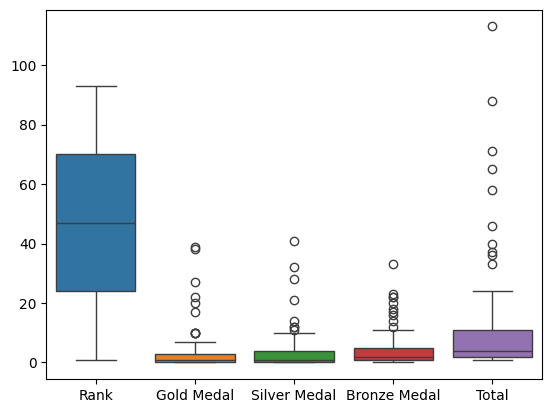

In [ ]:
sns.boxplot(data)

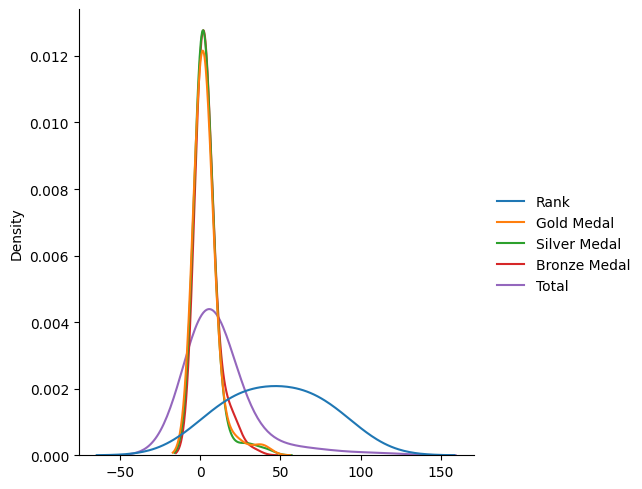

In [ ]:
sns.displot(data, kind = "kde", bw_adjust = 2)

In [ ]:
# Get list of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Country Code', 'Country'], dtype='object')

##**technical_officials dataset**

In [ ]:
#Load data
data = pd.read_csv("/content/technical_officials.csv")

In [ ]:
#Check head of data
data.head()

,name,short_name,gender,birth_date,country,discipline,function,url
0,ABAEVA Elena,ABAEVA E,Female,1966-04-21,Uzbekistan,Wrestling,Judge,../../../en/results/wrestling/athlete-profile-...
1,ABBAR Bachir,ABBAR B,Male,1965-05-03,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...
2,ABDELLATIF Makfouni,ABDELLATIF M,Male,1972-11-23,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...
3,ABE Miya,ABE M,Female,1992-10-27,Japan,Beach Volleyball,Referee,../../../en/results/beach-volleyball/athlete-p...
4,ACIGA FULA Antonio Stephen,ACIGA FULA AS,Male,1957-11-28,Uganda,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...


In [ ]:
#Check dimensions
data.shape

(956, 8)

In [ ]:
#Check data types
data.dtypes

name          object
short_name    object
gender        object
birth_date    object
country       object
discipline    object
function      object
url           object
dtype: object

In [ ]:
#Check missing values
data.isnull().sum()

name          0
short_name    0
gender        0
birth_date    0
country       0
discipline    0
function      0
url           0
dtype: int64

In [ ]:
#Check number of unique values in each column
data.nunique()

name          875
short_name    882
gender          2
birth_date    851
country       112
discipline     13
function       12
url           956
dtype: int64

In [ ]:
#Drop unnecessary columns
data = data.drop(columns = ["short_name"])

In [ ]:
#Calculate Age from birth date in "birth_date" column
#Create new column "Age" containing ages of technical officials
data["birth_date"] = pd.to_datetime(data["birth_date"]) #Convert column to datetime
current_date = datetime.now()
data["Age"] = (current_date - data["birth_date"]).dt.days / 365
data["Age"] = data["Age"].astype(int)
data["Age"]

0      58
1      59
2      51
3      31
4      66
       ..
951    54
952    45
953    37
954    66
955    66
Name: Age, Length: 956, dtype: int64

In [ ]:
#Drop "birth_date" column
data = data.drop(columns = "birth_date")

In [ ]:
#Descriptive Statistics to check for outliers
data.describe()

,Age
count,956.000000
mean,51.142259
std,11.458582
min,24.000000
25%,42.000000
50%,50.000000
75%,59.000000
max,85.000000


<Axes: >

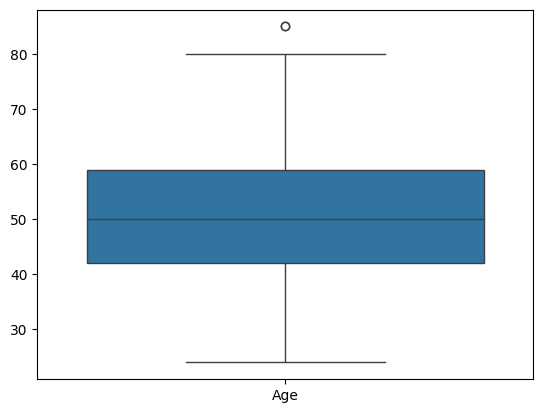

In [ ]:
#Boxplot to visualise outliers
sns.boxplot(data)

In [ ]:
#Maximum age of technical official
data["Age"].max()

85

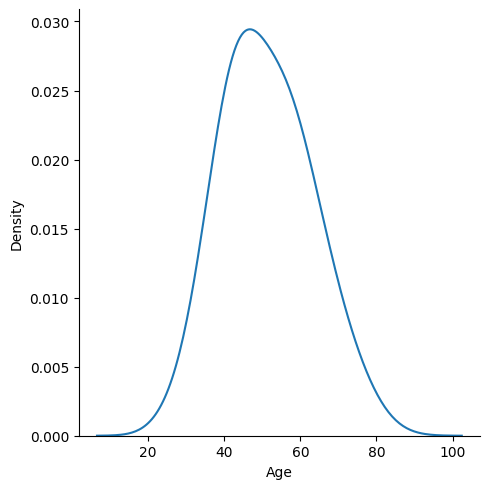

In [ ]:
#Displot to check distribution
sns.displot(data, x = "Age", kind = "kde", bw_adjust = 2)

In [ ]:
#Detect Outlier using IQR Method
percentile25 = data['Age'].quantile(0.25)
percentile75 = data['Age'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['Age'] > upper_limit]
data[data['Age'] < lower_limit]

,name,gender,country,discipline,function,url,Age


In [ ]:
#Capping outlier using IQR
data["Age"] = np.where(
    data['Age'] > upper_limit, upper_limit,
     np.where(
         data["Age"] < lower_limit, lower_limit,
         data["Age"]
     )
)
data.head()

,name,gender,country,discipline,function,url,Age
0,ABAEVA Elena,Female,Uzbekistan,Wrestling,Judge,../../../en/results/wrestling/athlete-profile-...,58.0
1,ABBAR Bachir,Male,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,59.0
2,ABDELLATIF Makfouni,Male,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,51.0
3,ABE Miya,Female,Japan,Beach Volleyball,Referee,../../../en/results/beach-volleyball/athlete-p...,31.0
4,ACIGA FULA Antonio Stephen,Male,Uganda,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,66.0


<Axes: >

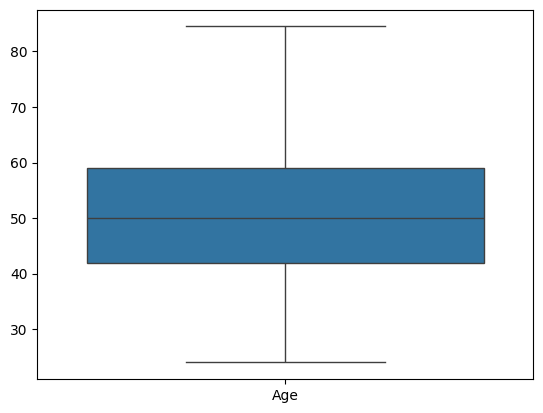

In [ ]:
#Check if outliers have been capped
sns.boxplot(data)

In [ ]:
# Get list of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
categorical_columns

Index(['name', 'gender', 'country', 'discipline', 'function', 'url'], dtype='object')

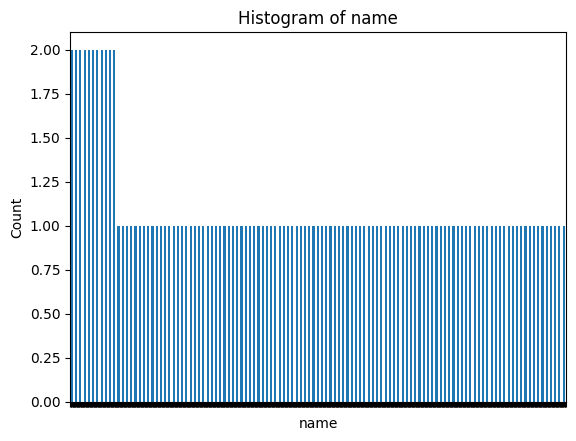

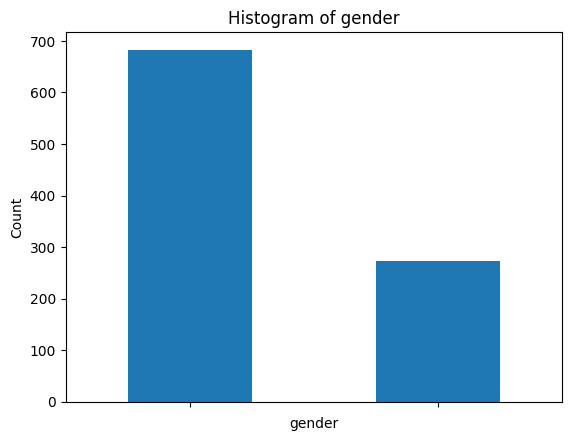

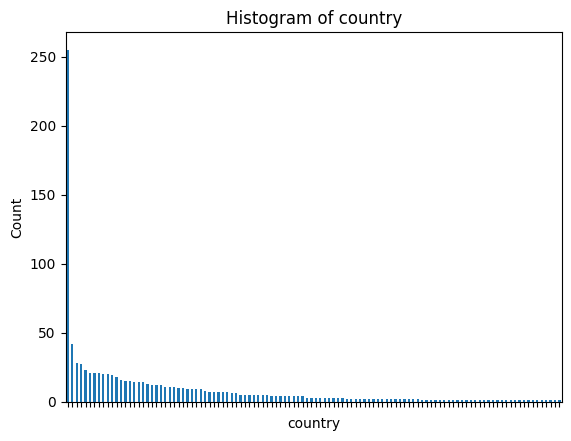

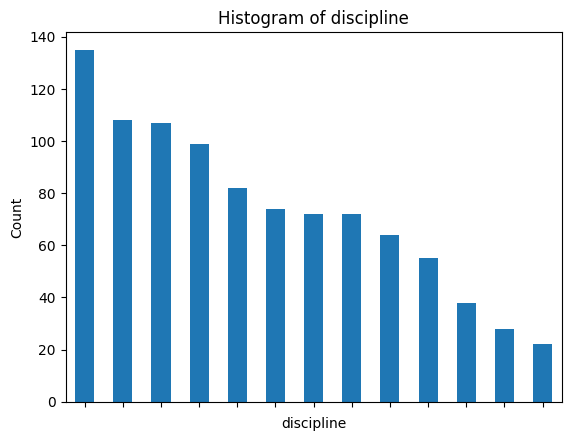

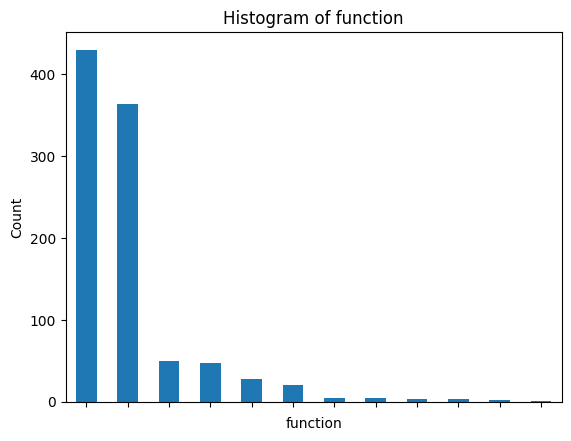

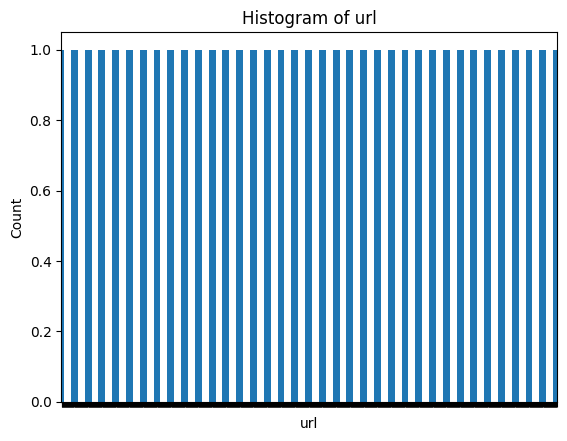

In [ ]:
# Plot histogram for each categorical column
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.gca().set_xticklabels([])
    plt.show()

In [ ]:
#Re-check head
data.head()

,name,gender,country,discipline,function,url,Age
0,ABAEVA Elena,Female,Uzbekistan,Wrestling,Judge,../../../en/results/wrestling/athlete-profile-...,58.0
1,ABBAR Bachir,Male,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,59.0
2,ABDELLATIF Makfouni,Male,Morocco,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,51.0
3,ABE Miya,Female,Japan,Beach Volleyball,Referee,../../../en/results/beach-volleyball/athlete-p...,31.0
4,ACIGA FULA Antonio Stephen,Male,Uganda,Boxing,Judge,../../../en/results/boxing/athlete-profile-n15...,66.0


In [ ]:
#Convert dataframe to csv
data.to_csv("technical_officials_cleaned.csv")